In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler # balanced data
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,recall_score,f1_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

import joblib

from collections import Counter

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')




In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [6]:
data.shape

(768, 9)

In [7]:
data.duplicated().sum()

0

# Analysis

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

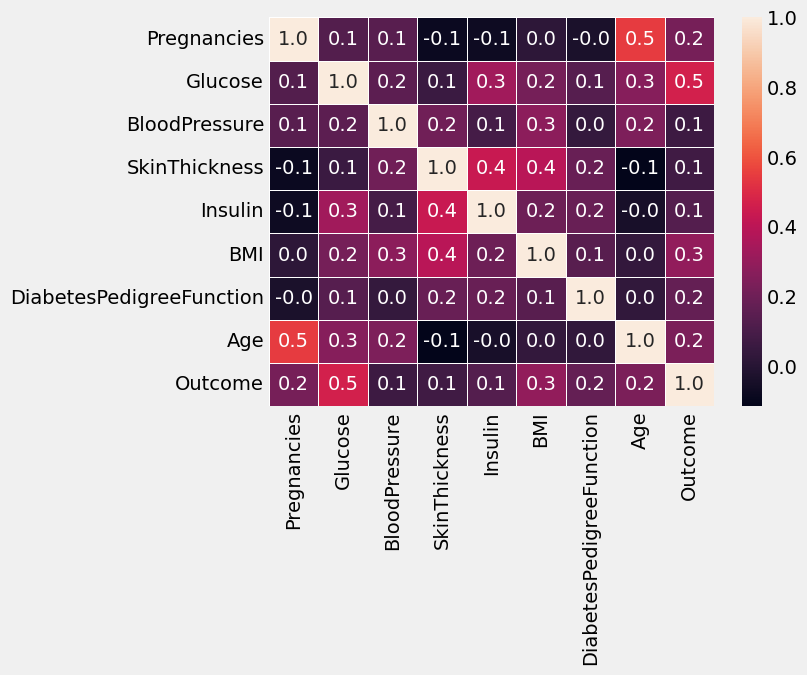

In [9]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f',linewidth=.5)

In [10]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

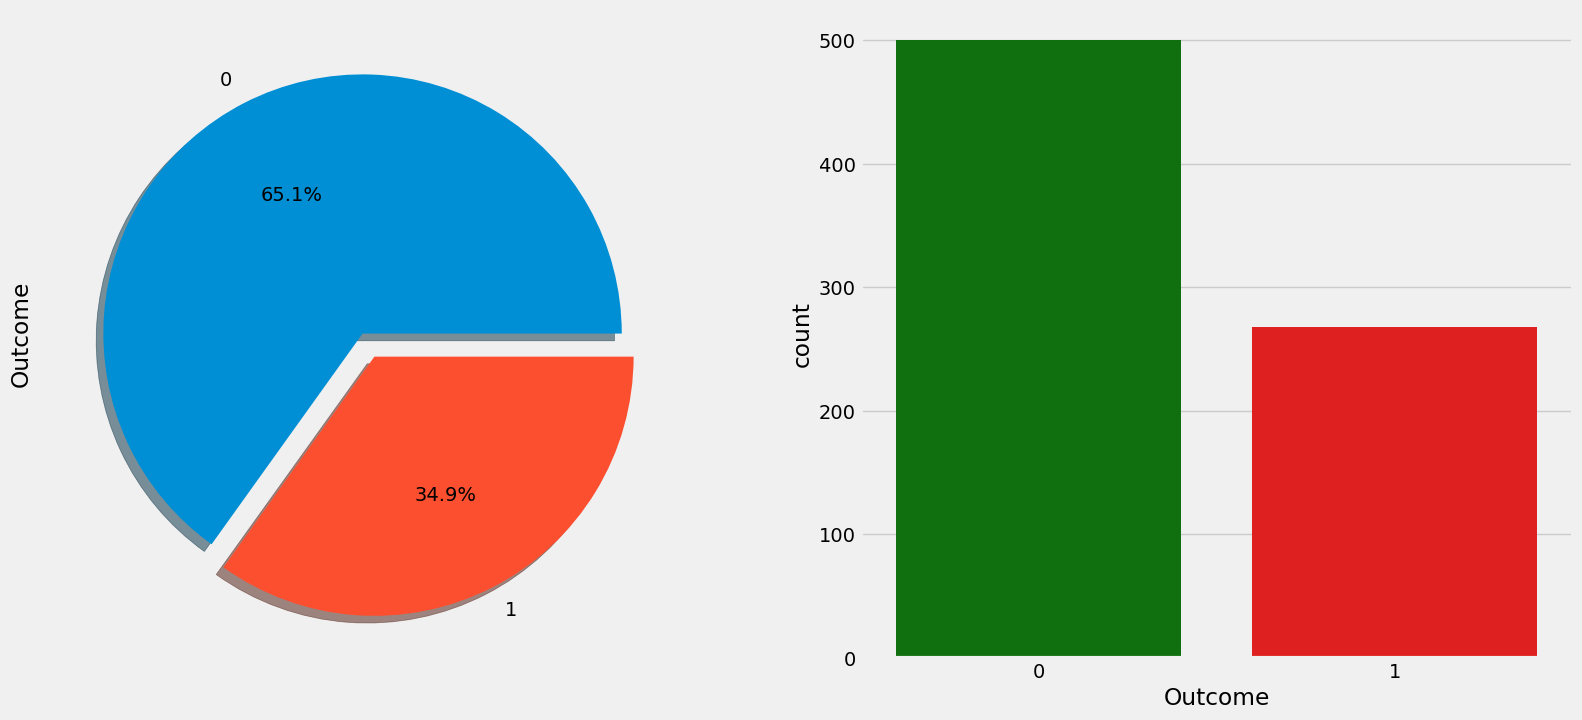

In [11]:

f,ax=plt.subplots(1,2,figsize=(18,8))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

sns.countplot(x='Outcome',data=data,palette=['g','r'],ax=ax[1])

plt.show()

In [12]:
maxi=data[data['Outcome']==0]
mini=data[data['Outcome']==1]
maxi.shape,mini.shape


((500, 9), (268, 9))

<AxesSubplot:>

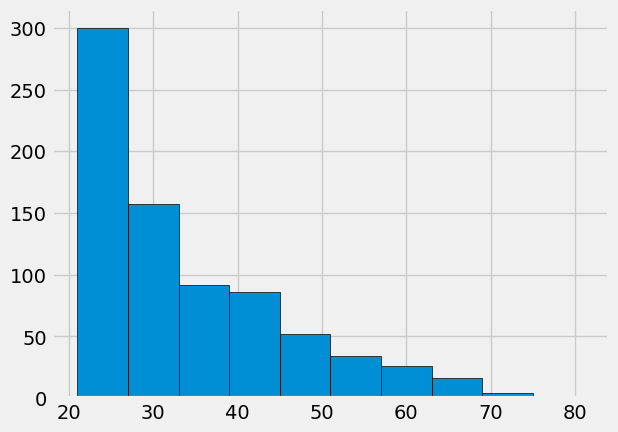

In [13]:
data["Age"].hist(edgecolor="black")

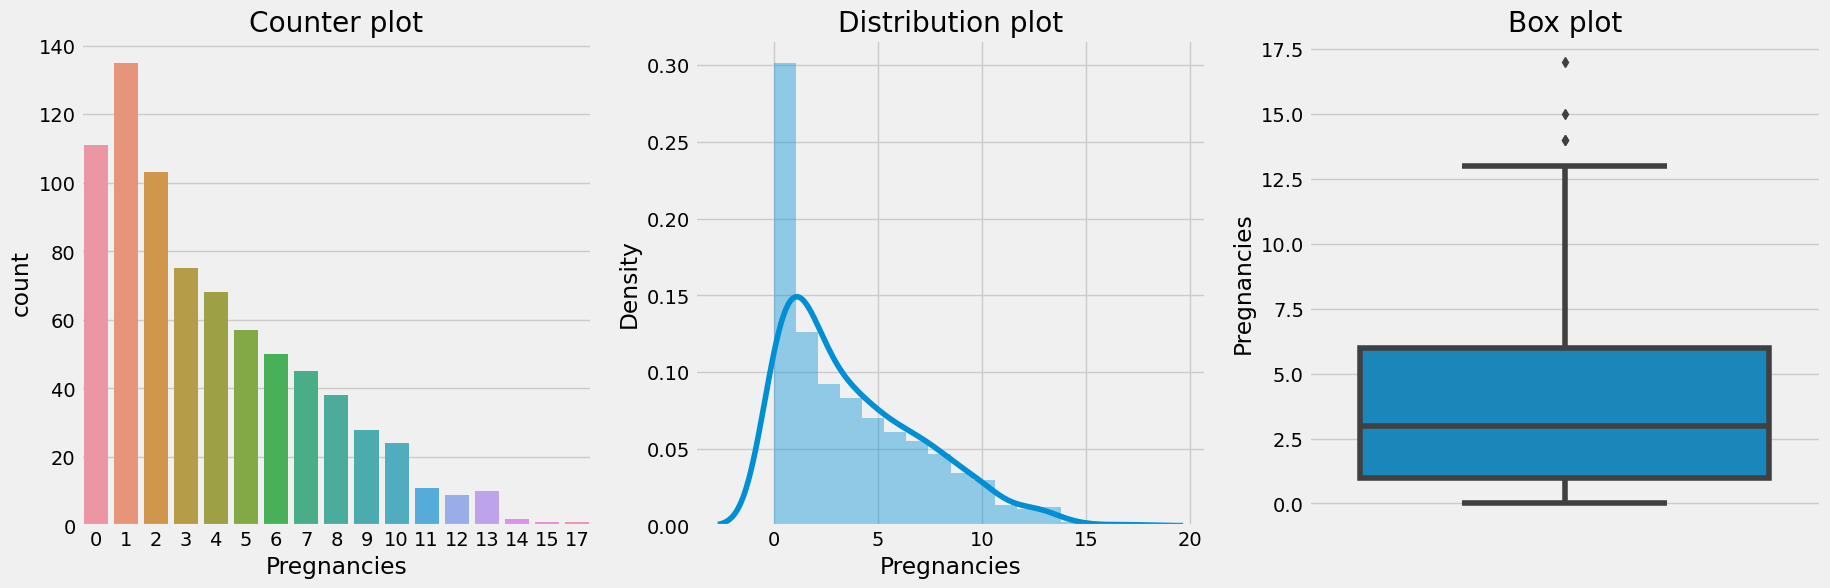

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Counter plot')
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title('Distribution plot')
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Box plot')
sns.boxplot(y=data["Pregnancies"])



plt.show()


<AxesSubplot:xlabel='BMI', ylabel='Density'>

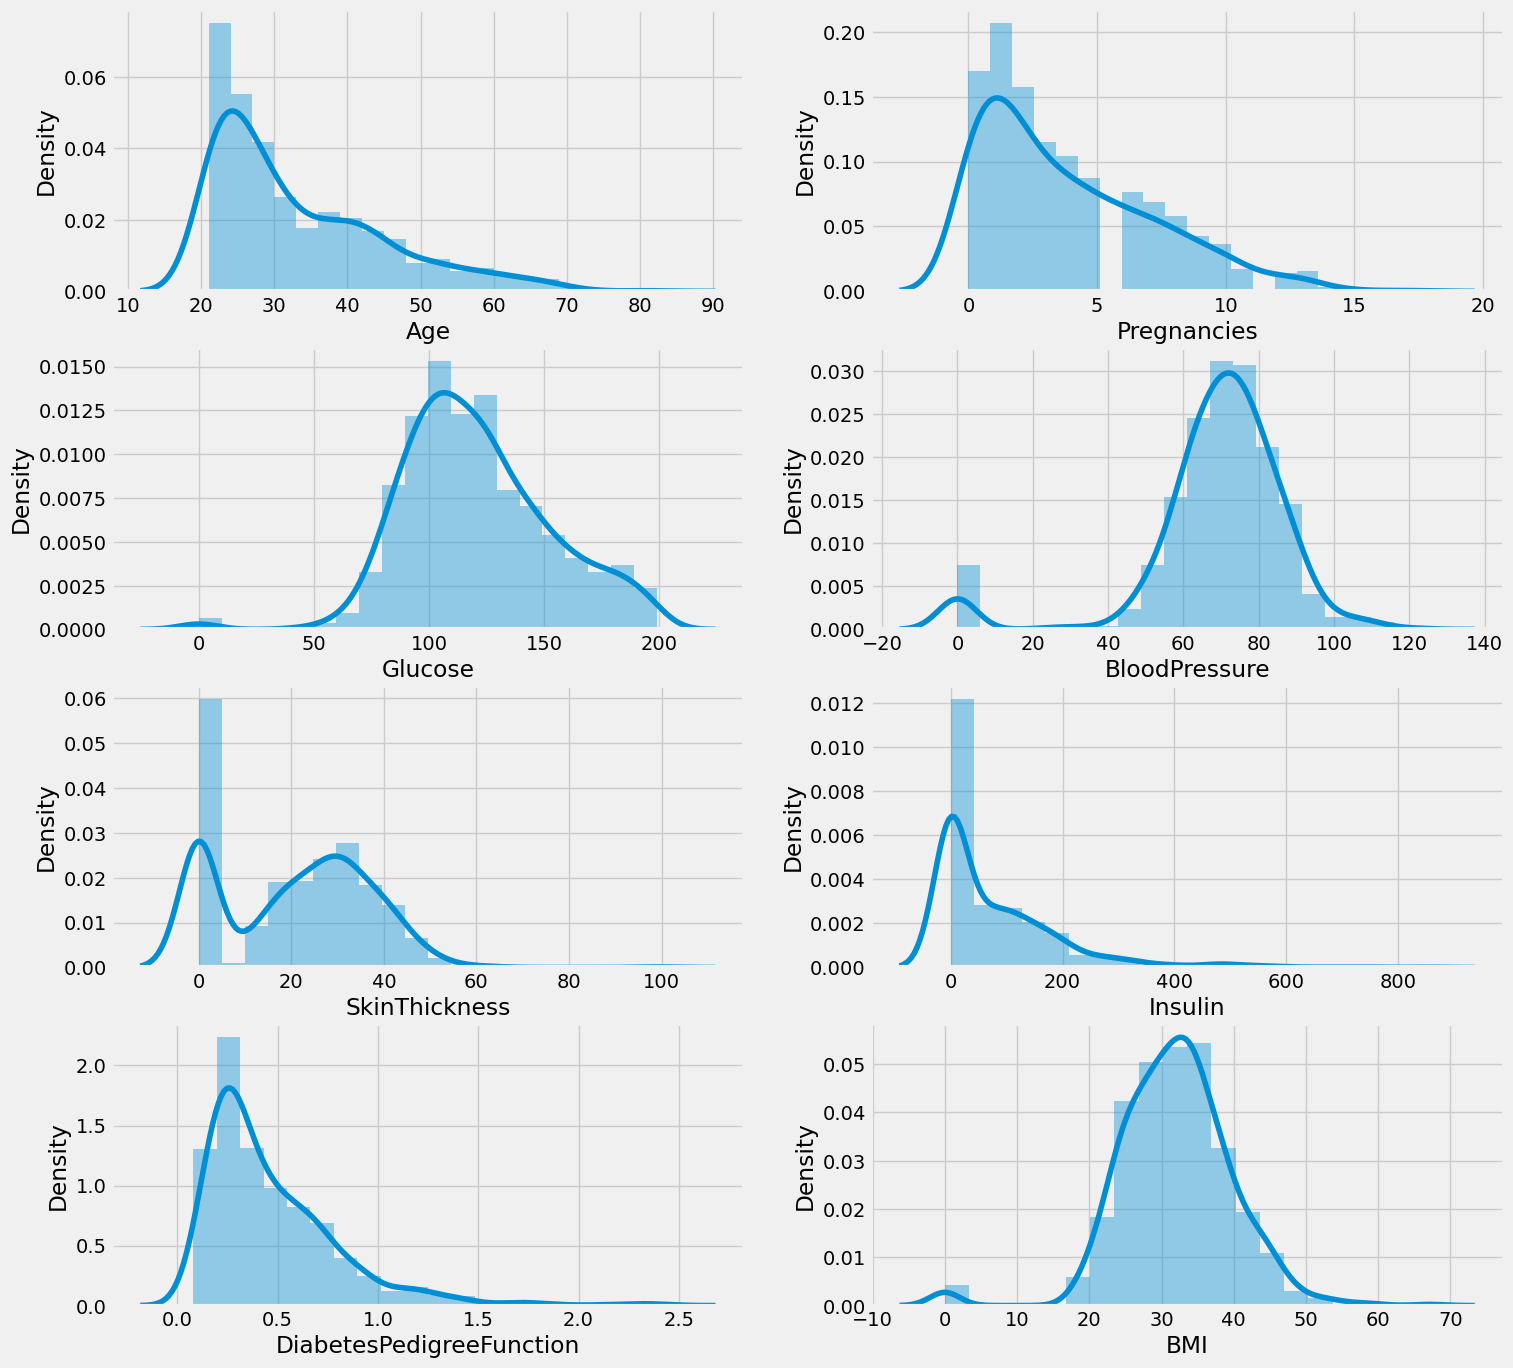

In [15]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(data.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(data.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(data.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(data.BMI, bins = 20, ax=ax[3,1]) 

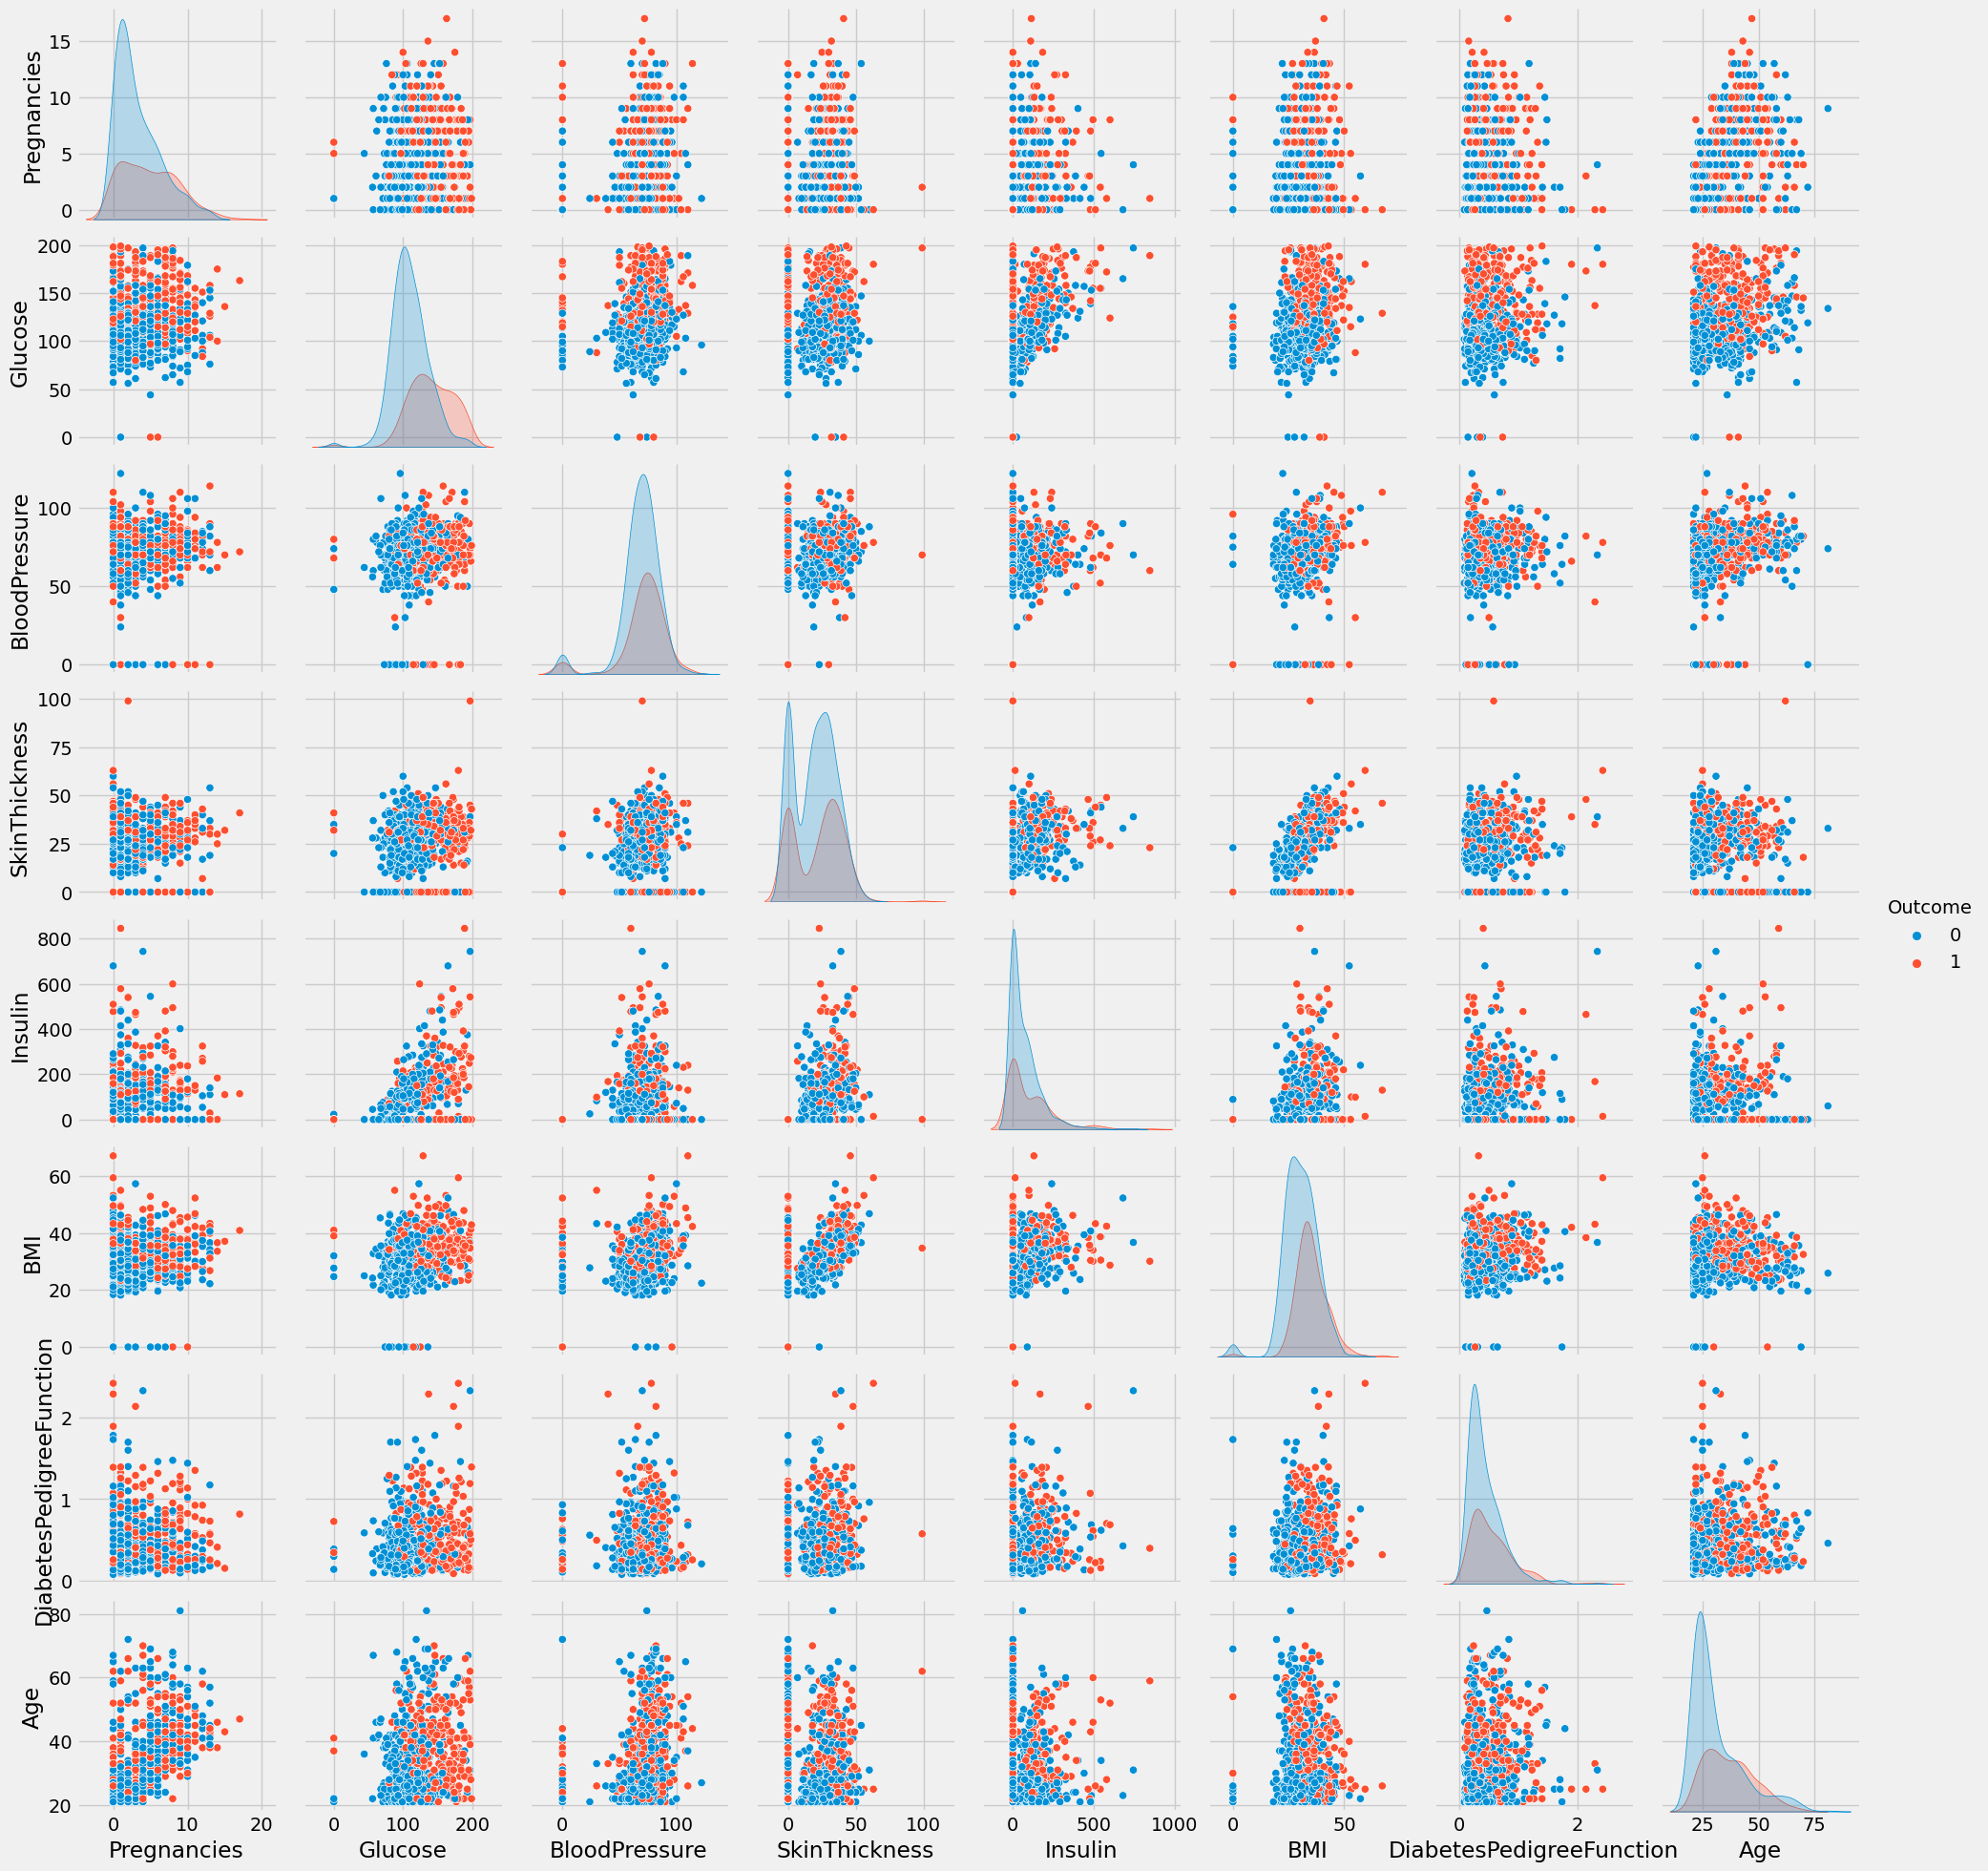

In [16]:

sns.pairplot(data = data, hue = 'Outcome')
plt.show()


In [17]:
print("max age:"+str(data['Age'].max())+ "Min Age: " + str(data["Age"].min()))

max age:81Min Age: 21


<AxesSubplot:xlabel='Age'>

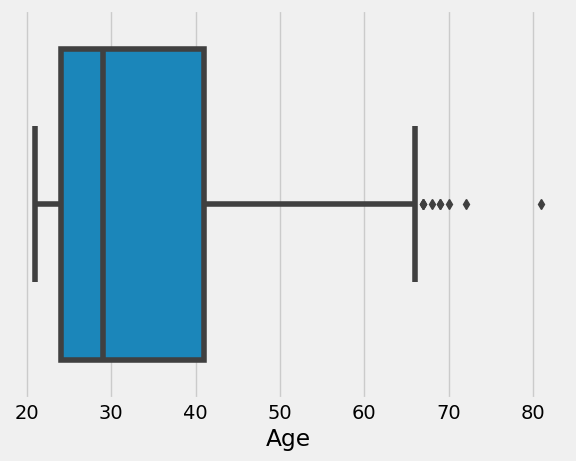

In [18]:
sns.boxplot(data.Age)

# data preprocessing

In [19]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [22]:
data_new=data
data_new["Glucose"].fillna(data_new["Glucose"].mean(), inplace = True)
data_new["BloodPressure"].fillna(data_new["BloodPressure"].mean(), inplace = True)
data_new["SkinThickness"].fillna(data_new["SkinThickness"].mean(), inplace = True)
data_new["Insulin"].fillna(data_new["Insulin"].mean(), inplace = True)
data_new["BMI"].fillna(data_new["BMI"].mean(), inplace = True)

In [23]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [24]:
sc = MinMaxScaler(feature_range = (0, 1))
data_scaled = sc.fit_transform(data_new)
data_scaled = pd.DataFrame(data_scaled)

# Create Model


In [25]:
#x=input , y=result
x=data.drop(columns=['Outcome'])
y=data['Outcome']


In [26]:
rm=RandomOverSampler(random_state=41) # balance data
x_res,y_res=rm.fit_resample(x,y)
print('old data{}'.format(Counter(y)))
print('new data{}'.format(Counter(y_res)))


old dataCounter({0: 500, 1: 268})
new dataCounter({1: 500, 0: 500})


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

ros = RandomOverSampler(random_state=42)
x_train_res, y_train_res = ros.fit_resample(x_train, y_train)
print('old data{}'.format(Counter(y_train)))
print('new data{}'.format(Counter(y_train_res)))

old dataCounter({0: 401, 1: 213})
new dataCounter({0: 401, 1: 401})


In [28]:
#built model
model1=LogisticRegression(max_iter=1000, random_state=42)
model2=SVC(kernel = 'linear', random_state = 42)
model3=RandomForestClassifier(
     n_estimators=200,  
    max_depth=8,       
    min_samples_split=5,                 
    min_samples_leaf=2,    
    class_weight='balanced_subsample',  
    max_features='sqrt', 
    random_state=42,
    n_jobs=-1       
)
model4=GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
        )


In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [32]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

LogisticRegression(max_iter=1000, random_state=42)
accuracy is : 0.7532467532467533 recall is : 0.6666666666666666 f1 is: 0.6415094339622642


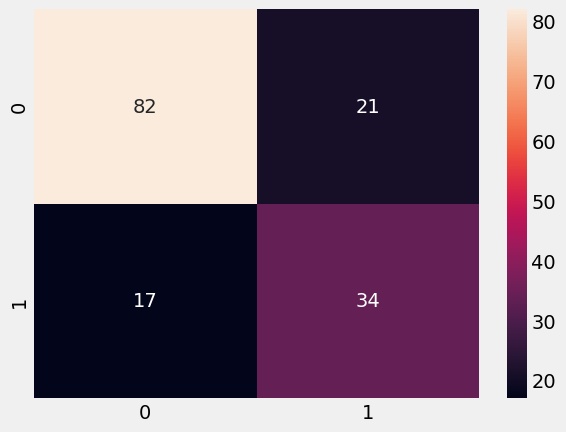

In [33]:
def cal(model): 
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    
    
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is :',accuracy,'recall is :',recall,'f1 is:',f1 )
cal(model1)    


SVC(kernel='linear', random_state=42)
accuracy is : 0.7532467532467533 recall is : 0.6666666666666666 f1 is: 0.6415094339622642


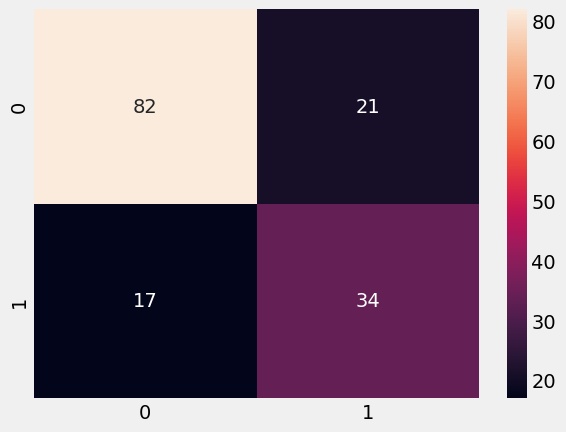

In [34]:
cal(model2)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=42)
accuracy is : 0.7662337662337663 recall is : 0.6376811594202898 f1 is: 0.7096774193548386


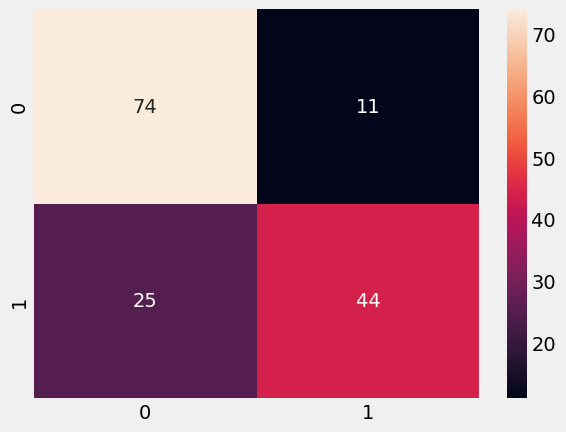

In [35]:
cal(model3)

GradientBoostingClassifier(n_estimators=200, random_state=42)
accuracy is : 0.7467532467532467 recall is : 0.6290322580645161 f1 is: 0.6666666666666666


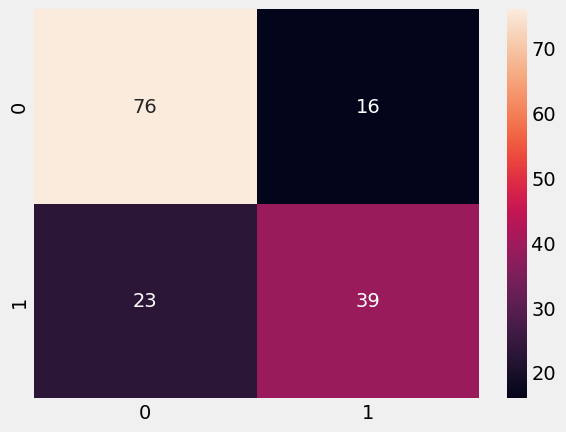

In [36]:
cal(model4)

In [37]:
result2


[0.6666666666666666,
 0.6666666666666666,
 0.6376811594202898,
 0.6290322580645161]

In [38]:
result1

[0.7532467532467533,
 0.7532467532467533,
 0.7662337662337663,
 0.7467532467532467]

In [39]:
result3

[0.6415094339622642,
 0.6415094339622642,
 0.7096774193548386,
 0.6666666666666666]

In [40]:
Finalresult=pd.DataFrame({'Algroithm':columns,'Accuracies':result1,'Recall':result2,'fScore':result3})
Finalresult

,Algroithm,Accuracies,Recall,fScore
0,LogisticRegression,0.753247,0.666667,0.641509
1,SVC,0.753247,0.666667,0.641509
2,RandomForestClassifier,0.766234,0.637681,0.709677
3,GradientBoostingClassifier,0.746753,0.629032,0.666667


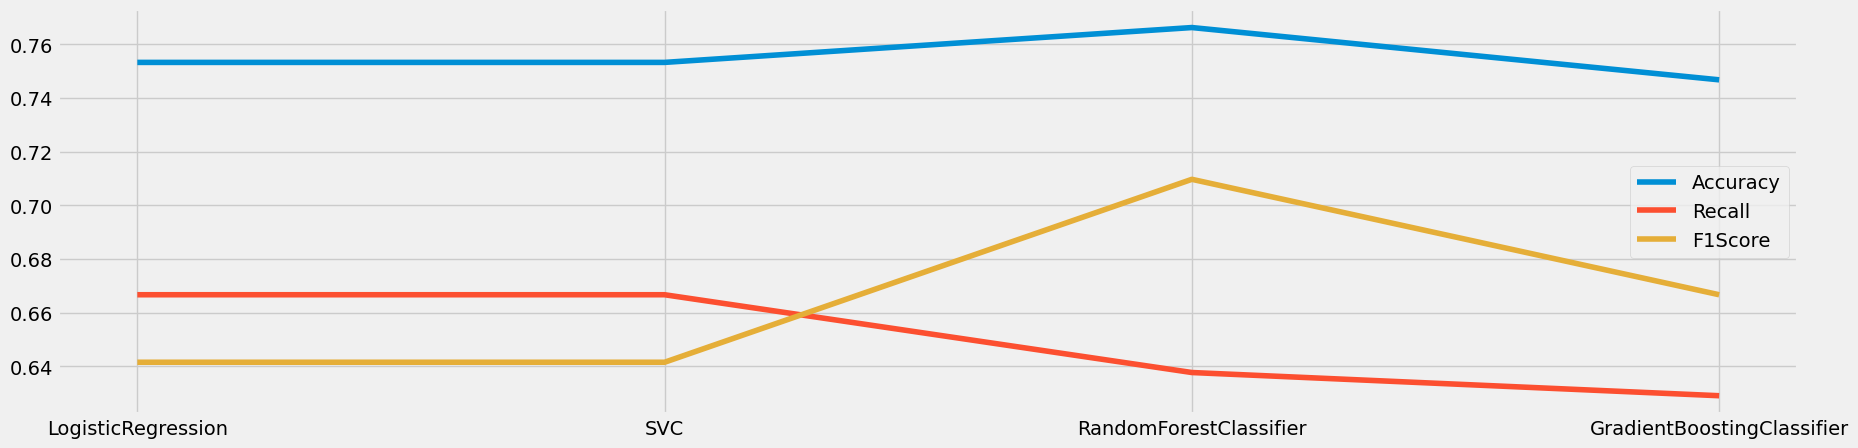

In [41]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(Finalresult.Algroithm,result1,label='Accuracy')
plt.plot(Finalresult.Algroithm,result2,label='Recall')
plt.plot(Finalresult.Algroithm,result3,label='F1Score')
plt.legend()
plt.show()


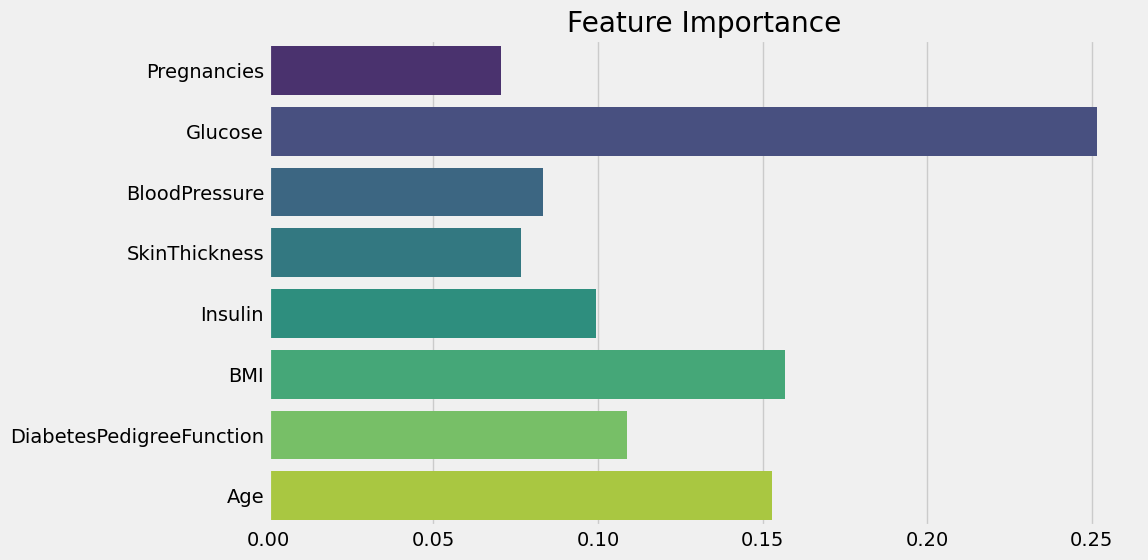

In [42]:
plt.figure(figsize=(10,6))
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf_model.fit(x_train_res, y_train_res)
importances = rf_model.feature_importances_
features = x.columns
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV

params = { 
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

best_model = grid.best_estimator_
print("best model:", best_model)





best model: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)


In [44]:
import joblib
best_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)
best_model.fit(x_train_res, y_train_res)
joblib.dump(best_model, 'diabetes_model.pkl')


['diabetes_model.pkl']

In [45]:
import joblib  

# تحميل النموذج اللي حفظتيه
model = joblib.load("diabetes_model.pkl")  

In [46]:
y_pred = model.predict(x_test)

# عرض أول 5 نتائج
print("first 5:", y_pred[:5])

first 5: [1 0 0 0 1]


In [47]:

accuracy = accuracy_score(y_test, y_pred)

print(f"accuracy {accuracy * 100:.2f}%")


accuracy 76.62%


In [48]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.76      0.81        99
           1       0.64      0.78      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.77       154

